### NAMA : Bimasakti Cahyo Utomo
### NIM  : 2209106021
## POSTTEST 6

In [863]:
import pandas as pd

In [864]:
df = pd.read_csv('chip_dataset.csv')
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,4849,NVIDIA Quadro 3000M,GPU,2011-02-22,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA,NaN,432.0,36.0
4850,4850,Intel GMA 950,GPU,2005-06-01,90.0,7.0,NaN,NaN,250.0,Intel,Intel,NaN,NaN,NaN
4851,4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,NaN,52.8,NaN
4852,4852,NVIDIA GeForce FX 5200,GPU,2003-03-06,150.0,NaN,65.0,29.0,250.0,TSMC,NVIDIA,NaN,NaN,NaN


## Data Preprocesing

In [865]:
import numpy as np

In [866]:
df.isnull().sum()

Unnamed: 0                  0
Product                     0
Type                        0
Release Date                0
Process Size (nm)           9
TDP (W)                   626
Die Size (mm^2)           715
Transistors (million)     711
Freq (MHz)                  0
Foundry                     0
Vendor                      0
FP16 GFLOPS              4318
FP32 GFLOPS              2906
FP64 GFLOPS              3548
dtype: int64

In [867]:
df.drop(['FP16 GFLOPS','FP32 GFLOPS', 'FP64 GFLOPS'], axis = 1, inplace= True)

In [868]:
df['Process Size (nm)'] = df['Process Size (nm)'].fillna(df['Process Size (nm)'].mean())
df['TDP (W)'] = df['TDP (W)'].fillna(df['TDP (W)'].mean())
df['Die Size (mm^2)'] = df['Die Size (mm^2)'].fillna(df['Die Size (mm^2)'].mean())
df['Transistors (million)'] = df['Transistors (million)'].fillna(df['Transistors (million)'].mean())
# df['FP16 GFLOPS'] = df['FP16 GFLOPS'].fillna(df['FP16 GFLOPS'].mean())
# df['FP32 GFLOPS'] = df['FP32 GFLOPS'].fillna(df['FP32 GFLOPS'].mean())
# df['FP64 GFLOPS'] = df['FP64 GFLOPS'].fillna(df['FP64 GFLOPS'].mean())
df.isnull().sum()

Unnamed: 0               0
Product                  0
Type                     0
Release Date             0
Process Size (nm)        0
TDP (W)                  0
Die Size (mm^2)          0
Transistors (million)    0
Freq (MHz)               0
Foundry                  0
Vendor                   0
dtype: int64

In [869]:
df.drop(columns='Unnamed: 0', inplace=True)
df.select_dtypes(['int64' , 'float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Process Size (nm)      4854 non-null   float64
 1   TDP (W)                4854 non-null   float64
 2   Die Size (mm^2)        4854 non-null   float64
 3   Transistors (million)  4854 non-null   float64
 4   Freq (MHz)             4854 non-null   float64
dtypes: float64(5)
memory usage: 189.7 KB


In [870]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product       4854 non-null   object
 1   Type          4854 non-null   object
 2   Release Date  4854 non-null   object
 3   Foundry       4854 non-null   object
 4   Vendor        4854 non-null   object
dtypes: object(5)
memory usage: 189.7+ KB


##### Remove Outlier

In [871]:
from scipy import stats

df = df[(np.abs(stats.zscore(df.select_dtypes(['int64' , 'float64']))) < 3).all(axis=1)]

In [872]:
df2 = df.drop(['Product', 'Release Date', 'Foundry', 'Vendor'], axis = 1)

In [873]:
df2

,Type,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz)
0,CPU,65.0,45.000000,77.000000,122.000000,2200.0
1,CPU,14.0,35.000000,192.000000,4800.000000,3200.0
2,CPU,10.0,28.000000,188.440445,1929.922279,2600.0
3,CPU,22.0,80.000000,160.000000,1400.000000,1800.0
4,CPU,45.0,125.000000,258.000000,758.000000,3700.0
...,...,...,...,...,...,...
4849,GPU,40.0,75.000000,332.000000,1950.000000,450.0
4850,GPU,90.0,7.000000,188.440445,1929.922279,250.0
4851,GPU,40.0,23.000000,100.000000,486.000000,500.0
4852,GPU,150.0,81.359981,65.000000,29.000000,250.0


# DNN Chip Dataset

### Split Dataset

In [874]:
# X_val = df[['Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)']]
# y_val = df['Type']

In [875]:
X = df[['Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)']]
y = df['Type']

In [876]:
# X_val = df[['Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)']]
# y_val = df['Type']

In [877]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Scaling

In [878]:
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [879]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
# y_val = le.fit_transform(y_val)

In [880]:
X_train.shape

(3720, 5)

## Membuat Model

#### Compile Model

In [881]:
model = Sequential([
    layers.Dense(16, activation='sigmoid', input_shape=[5]), #Input Layer
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Output Layer
])

model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Fit Model

In [882]:
model.fit(X_train, y_train, epochs = 20,validation_split=0.2)

Epoch 1/20
93/93 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6277 - val_loss: 0.6513 - val_accuracy: 0.8266
Epoch 2/20
93/93 [==============================] - 0s 1ms/step - loss: 0.6333 - accuracy: 0.7419 - val_loss: 0.6130 - val_accuracy: 0.7876
Epoch 3/20
93/93 [==============================] - 0s 1ms/step - loss: 0.5814 - accuracy: 0.8411 - val_loss: 0.5482 - val_accuracy: 0.9086
Epoch 4/20
93/93 [==============================] - 0s 1ms/step - loss: 0.4992 - accuracy: 0.8925 - val_loss: 0.4523 - val_accuracy: 0.9059
Epoch 5/20
93/93 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.9315 - val_loss: 0.3473 - val_accuracy: 0.9234
Epoch 6/20
93/93 [==============================] - 0s 1ms/step - loss: 0.2949 - accuracy: 0.9506 - val_loss: 0.2636 - val_accuracy: 0.9288
Epoch 7/20
93/93 [==============================] - 0s 1ms/step - loss: 0.2213 - accuracy: 0.9627 - val_loss: 0.2045 - val_accuracy: 0.9462
Epoch 8/20
93/93 [==

In [883]:
# class MyCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('acc') > 0.84 and logs.get('val_acc') > 0.84):
#             self.model.stop_training = True

# callback_function = MyCallback()


# model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[callback_function])

#### Accuracy

In [884]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 703us/step - loss: 0.0730 - accuracy: 0.9742


[0.07298468798398972, 0.9741935729980469]

In [885]:
y_pred = np.where(y_pred > 0.5, 1, 0).reshape(-1)

In [886]:
accuracy_score(y_test, y_pred)

0.9720430107526882

#### Grafik

In [887]:
import matplotlib.pyplot as plt

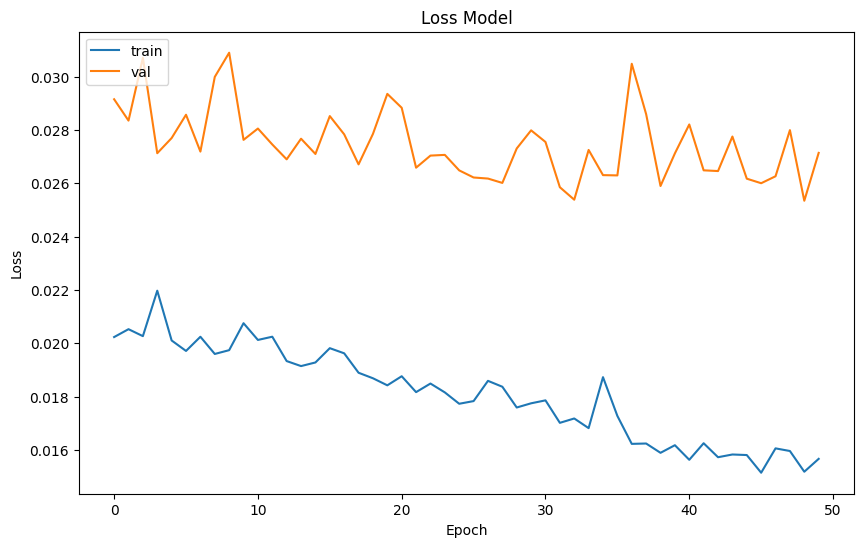

In [888]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

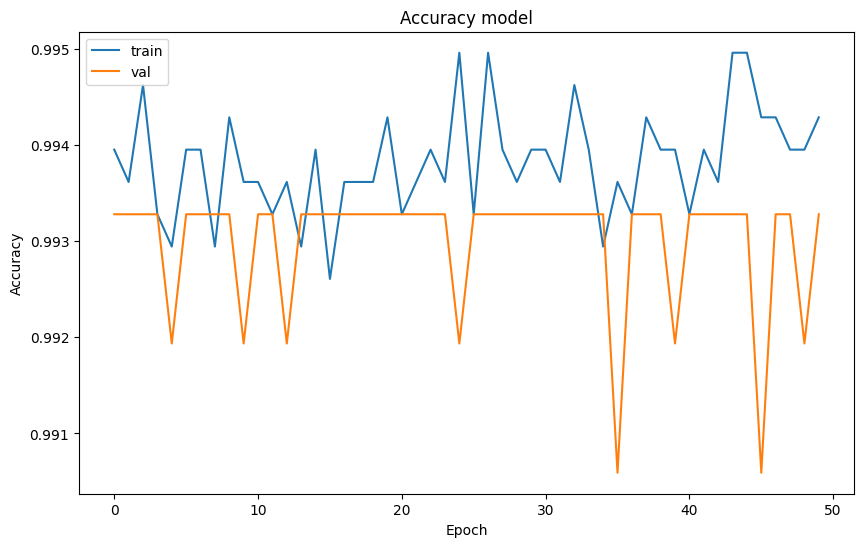

In [889]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()